<a href="https://colab.research.google.com/github/denverkim/IntroToML/blob/main/Decision_Tree_%EC%8B%9C%EA%B0%81%ED%99%94_(Iris_%EC%98%88%EC%A0%9C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1️⃣ 기본 설정 및 데이터 불러오기

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus
from IPython.display import Image

# 데이터 로드
iris = load_iris()
X = iris.data
y = iris.target

# Decision Tree 모델 생성 (max_depth=3 예제)
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X, y)

DecisionTreeClassifier(max_depth=3)

# 2️⃣ 의사결정트리 시각화

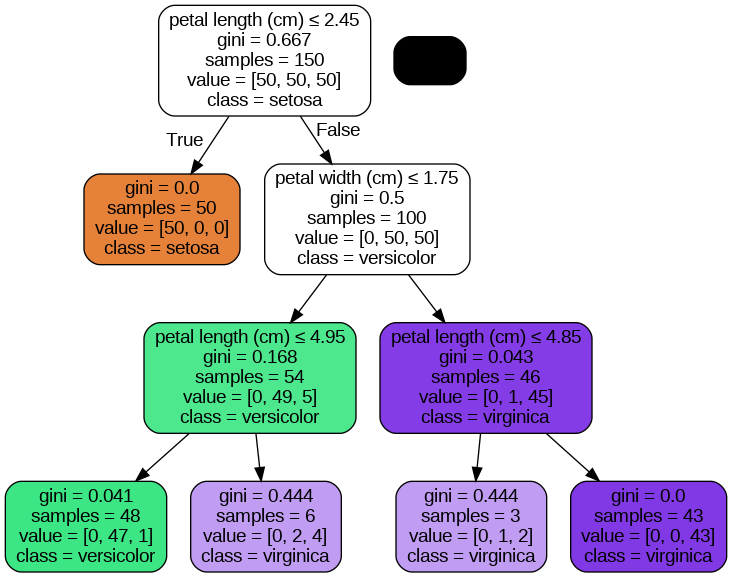

In [2]:
# 트리 구조를 DOT format으로 export
dot_data = tree.export_graphviz(dt,
                                out_file=None,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names,
                                filled=True,
                                rounded=True,
                                special_characters=True)

# DOT 데이터를 pydotplus로 그래프 생성
graph = pydotplus.graph_from_dot_data(dot_data)

# Jupyter Notebook에 바로 표시
Image(graph.create_png())

# 3️⃣ 이미지 파일로 저장

In [3]:
graph.write_pdf("iris.pdf")  # PDF 파일 저장
graph.write_png("iris.png")  # PNG 파일 저장

True

# 4️⃣ 모델 평가 (Accuracy & Cross Validation)

In [4]:
from sklearn.model_selection import cross_val_score

# 정확도 (accuracy)
accuracy = dt.score(X, y)
print(f"Training Accuracy: {accuracy:.2f}")

# 교차검증 (5-fold)
cv_scores = cross_val_score(dt, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.2f}")

Training Accuracy: 0.97
Cross-validation scores: [0.96666667 0.96666667 0.93333333 1.         1.        ]
Mean CV Accuracy: 0.97
